Import libraries & Load data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Since the notebook is inside notebooks/, go one folder up, then into data/
df = pd.read_csv("data/Student_Habits_Dataset.csv")
print("✅ Dataset Loaded")


✅ Dataset Loaded


Initial inspection

In [7]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.head()


Shape: (10000, 8)

Columns: ['Student_ID', 'Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Screen_Time_Per_Day', 'Physical_Activity_Hours', 'Attendance_Percentage', 'Healthy_Eating_Score', 'Academic_Performance']

Missing values:
 Student_ID                 0
Study_Hours_Per_Day        0
Sleep_Hours_Per_Day        0
Screen_Time_Per_Day        0
Physical_Activity_Hours    0
Attendance_Percentage      0
Healthy_Eating_Score       0
Academic_Performance       0
dtype: int64


,Student_ID,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Screen_Time_Per_Day,Physical_Activity_Hours,Attendance_Percentage,Healthy_Eating_Score,Academic_Performance
0,S00001,3.7,6.2,5.7,0.0,80.3,8,48.6
1,S00002,2.8,6.6,5.6,0.5,95.1,4,32.8
2,S00003,4.0,6.3,3.1,0.7,83.0,10,44.4
3,S00004,5.3,7.1,6.2,1.1,85.9,4,54.1
4,S00005,2.6,8.4,2.0,1.5,92.2,2,63.9


Drop ID & Clean

In [10]:
# Drop 'Student_ID' if it exists
if "Student_ID" in df.columns:
    df.drop(columns=["Student_ID"], inplace=True)
    print("🗑️ 'Student_ID' column dropped")
else:
    print("⚠️ 'Student_ID' column not found")

# Drop rows with missing values
df.dropna(inplace=True)
print("✅ Missing values removed")


⚠️ 'Student_ID' column not found
✅ Missing values removed


Summary statistics

In [11]:
df.describe()


,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Screen_Time_Per_Day,Physical_Activity_Hours,Attendance_Percentage,Healthy_Eating_Score,Academic_Performance
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.00947,7.016120,4.990220,1.000940,84.780320,5.475800,46.369710
std,1.47435,1.185427,1.946806,0.492806,9.454854,2.883305,13.854159
min,0.00000,4.000000,1.000000,0.000000,42.000000,1.000000,0.000000
25%,2.00000,6.200000,3.600000,0.700000,78.400000,3.000000,36.900000
50%,3.00000,7.000000,5.000000,1.000000,85.100000,5.000000,46.400000
75%,4.00000,7.800000,6.300000,1.300000,91.800000,8.000000,55.800000
max,8.90000,10.000000,12.000000,2.900000,100.000000,10.000000,100.000000


Correlation heatmap

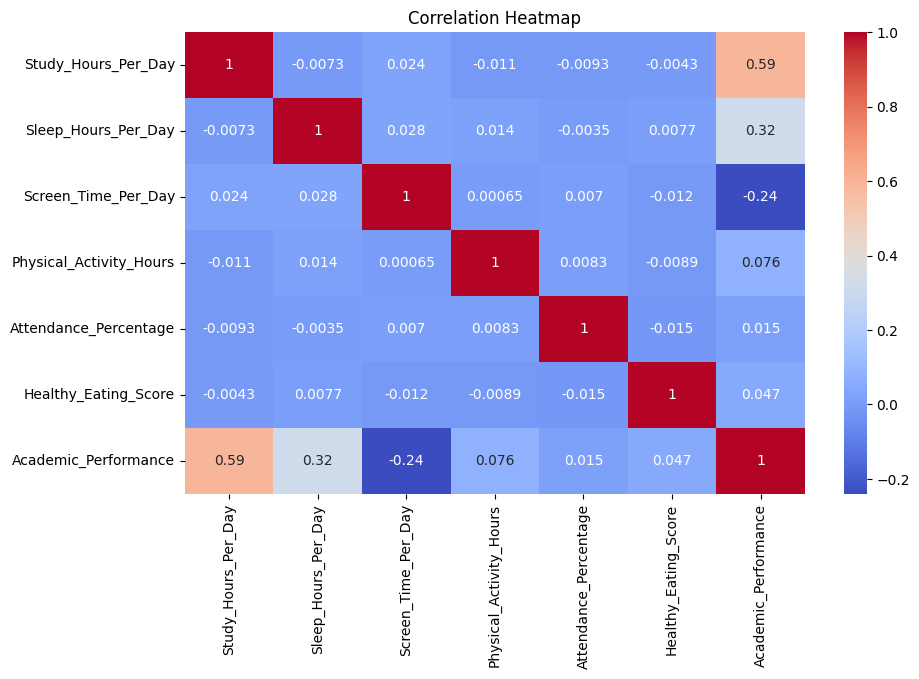

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Boxplots for outliers

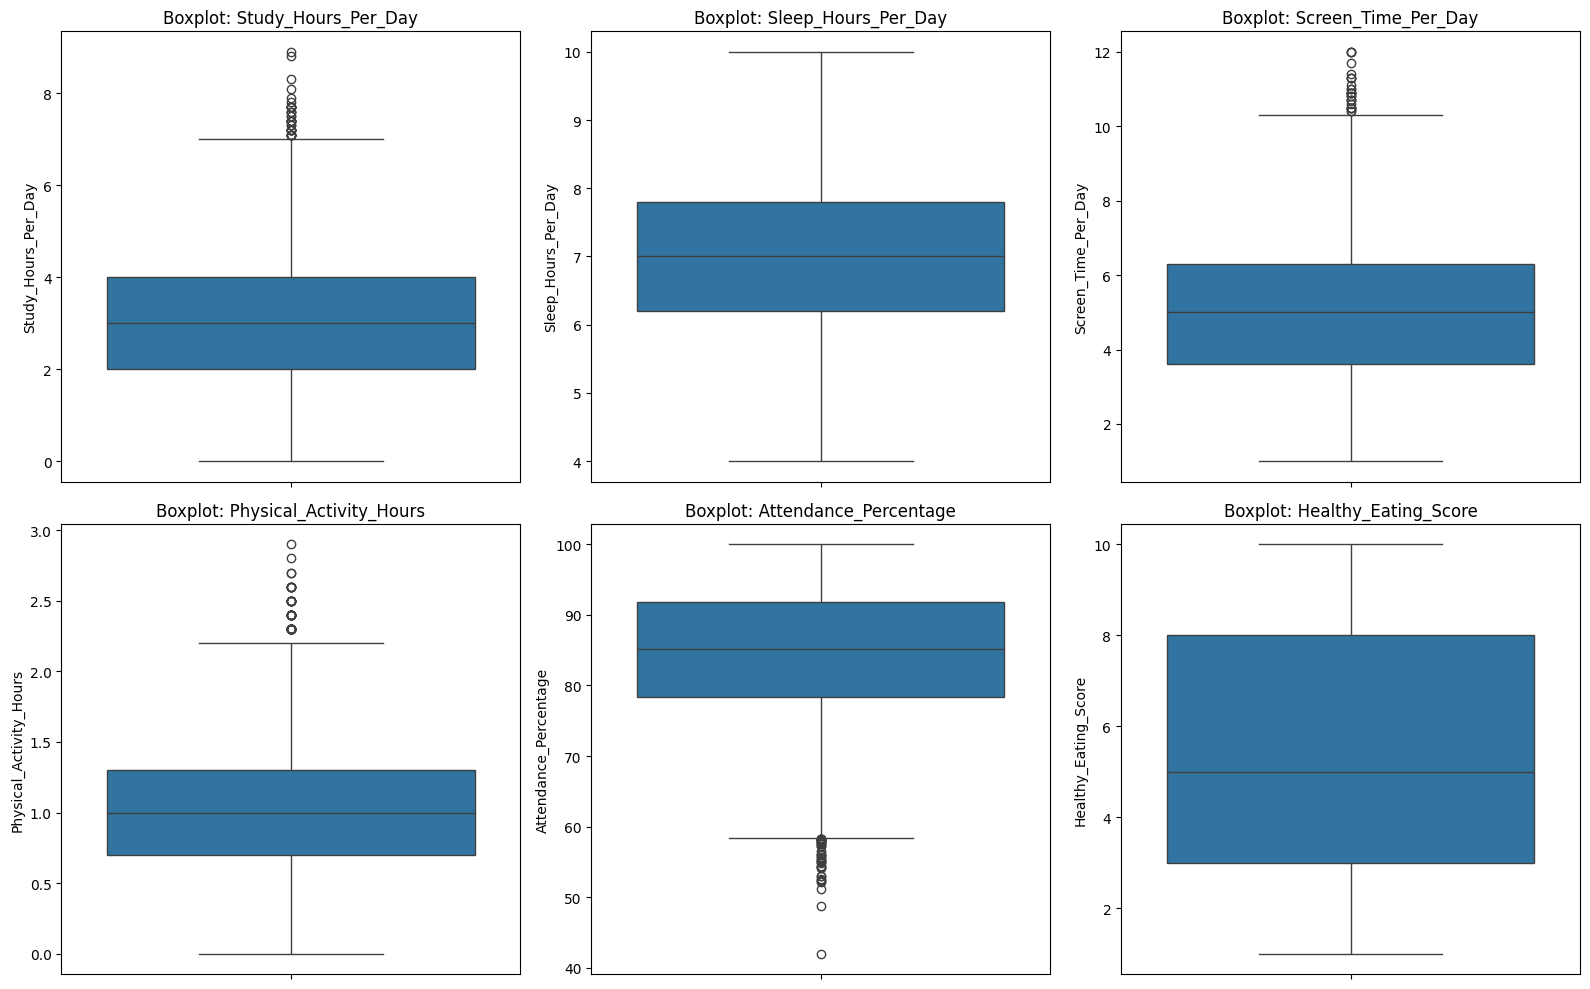

In [13]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()


Distributions

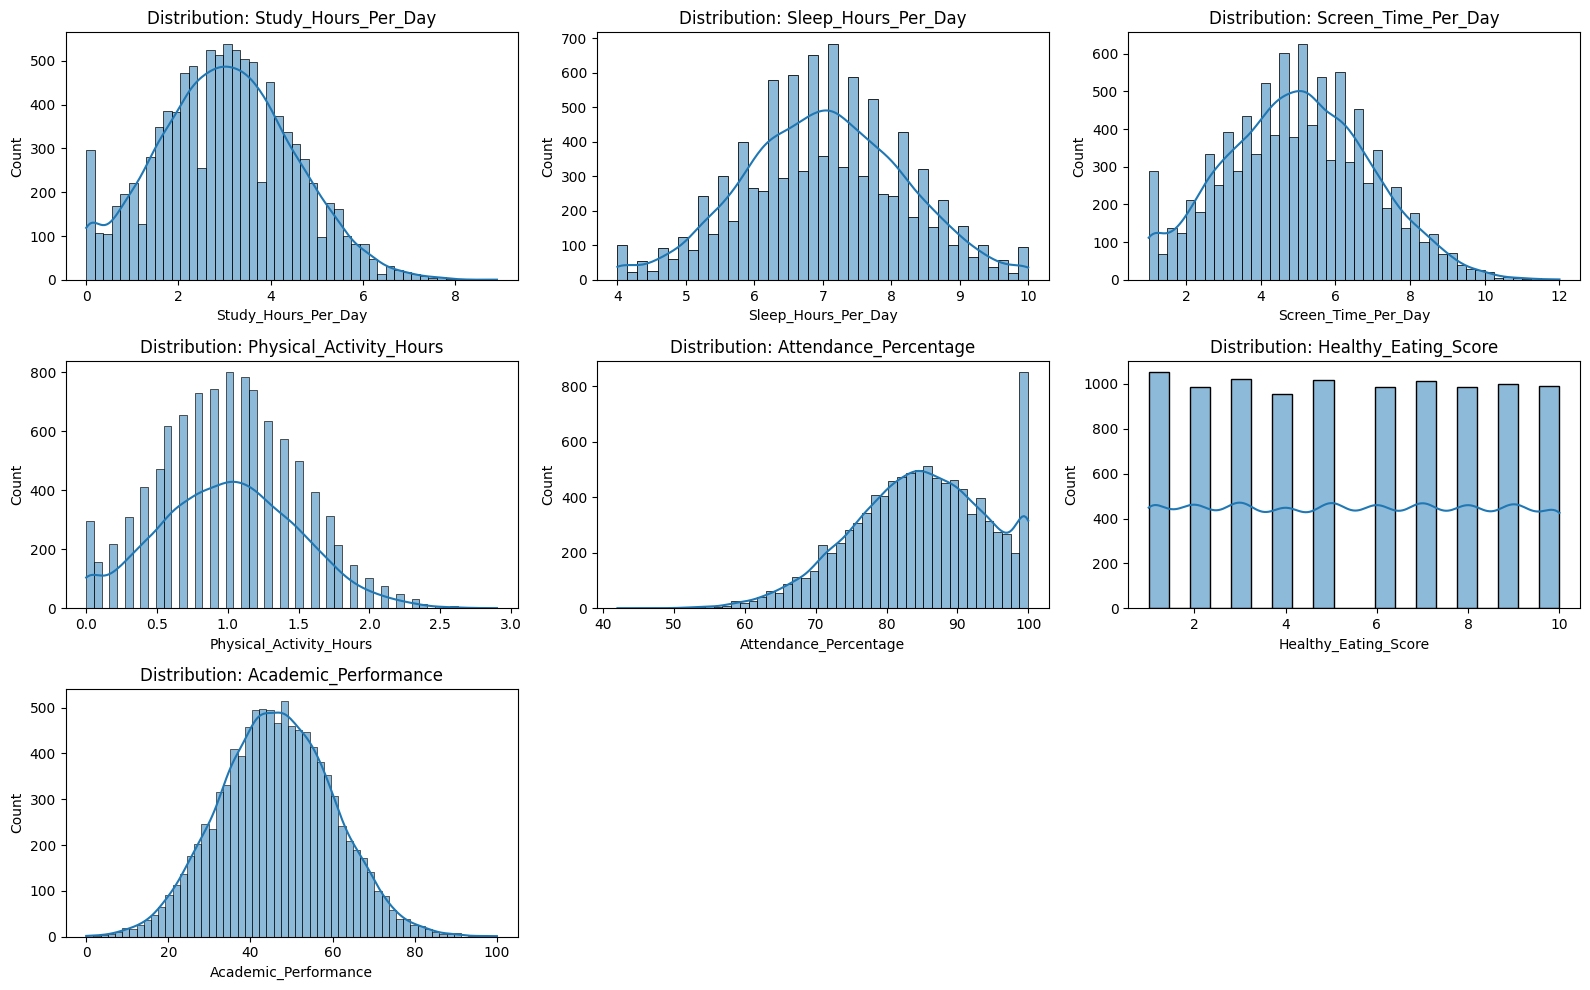

In [14]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()


Feature vs target

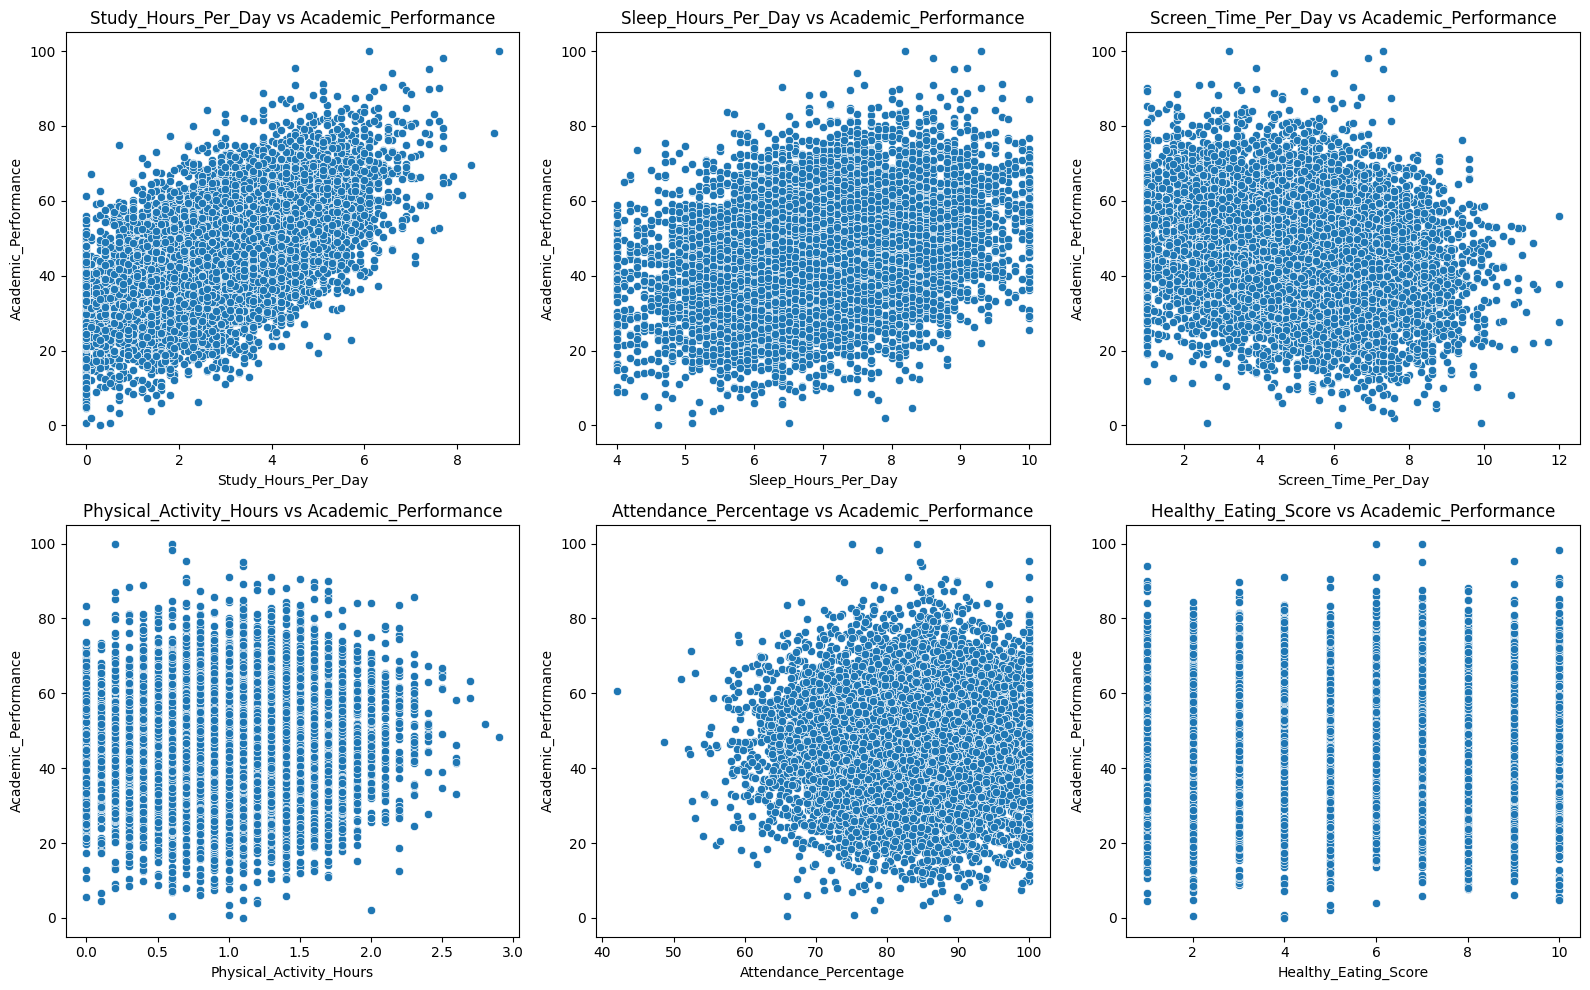

In [15]:
target = "Academic_Performance"
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
plt.tight_layout()
plt.show()


Data integrity & insights

In [16]:
print("Data Types:\n", df.dtypes)
print("Unique values per column:\n", df.nunique())

print("\n🧠 EDA Insights:")
print("- More study hours = better performance")
print("- Screen time negatively correlates with performance")
print("- Sleep and physical activity show positive trends")
print("- Attendance is strongly linked to performance")
print("- Data is clean, no missing values")


Data Types:
 Study_Hours_Per_Day        float64
Sleep_Hours_Per_Day        float64
Screen_Time_Per_Day        float64
Physical_Activity_Hours    float64
Attendance_Percentage      float64
Healthy_Eating_Score         int64
Academic_Performance       float64
dtype: object
Unique values per column:
 Study_Hours_Per_Day         84
Sleep_Hours_Per_Day         61
Screen_Time_Per_Day        106
Physical_Activity_Hours     30
Attendance_Percentage      442
Healthy_Eating_Score        10
Academic_Performance       769
dtype: int64

🧠 EDA Insights:
- More study hours = better performance
- Screen time negatively correlates with performance
- Sleep and physical activity show positive trends
- Attendance is strongly linked to performance
- Data is clean, no missing values
